## Import

In [203]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [204]:
data = pd.read_csv("salesdaily.csv")
data

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [205]:
data1 = pd.read_csv("salesweekly.csv")

In [206]:
data['datum'] = pd.to_datetime(data['datum'], infer_datetime_format=True)
data["Day"] = data["datum"].dt.day

In [207]:
data.index = data.pop('datum')
data

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,Day
datum,,,,,,,,,,,,,
2014-01-02,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday,2
2014-01-03,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday,3
2014-01-04,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday,4
2014-01-05,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday,5
2014-01-06,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday,4
2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday,5
2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday,6


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
 12  Day           2106 non-null   int32  
dtypes: float64(8), int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [209]:
data.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Day
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869,15.686135
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547,8.806215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000,1.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000,8.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000,16.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000,23.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000,31.000000


In [210]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
Day             0
dtype: int64


In [211]:
data.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Hour', 'Weekday Name', 'Day'],
      dtype='object')

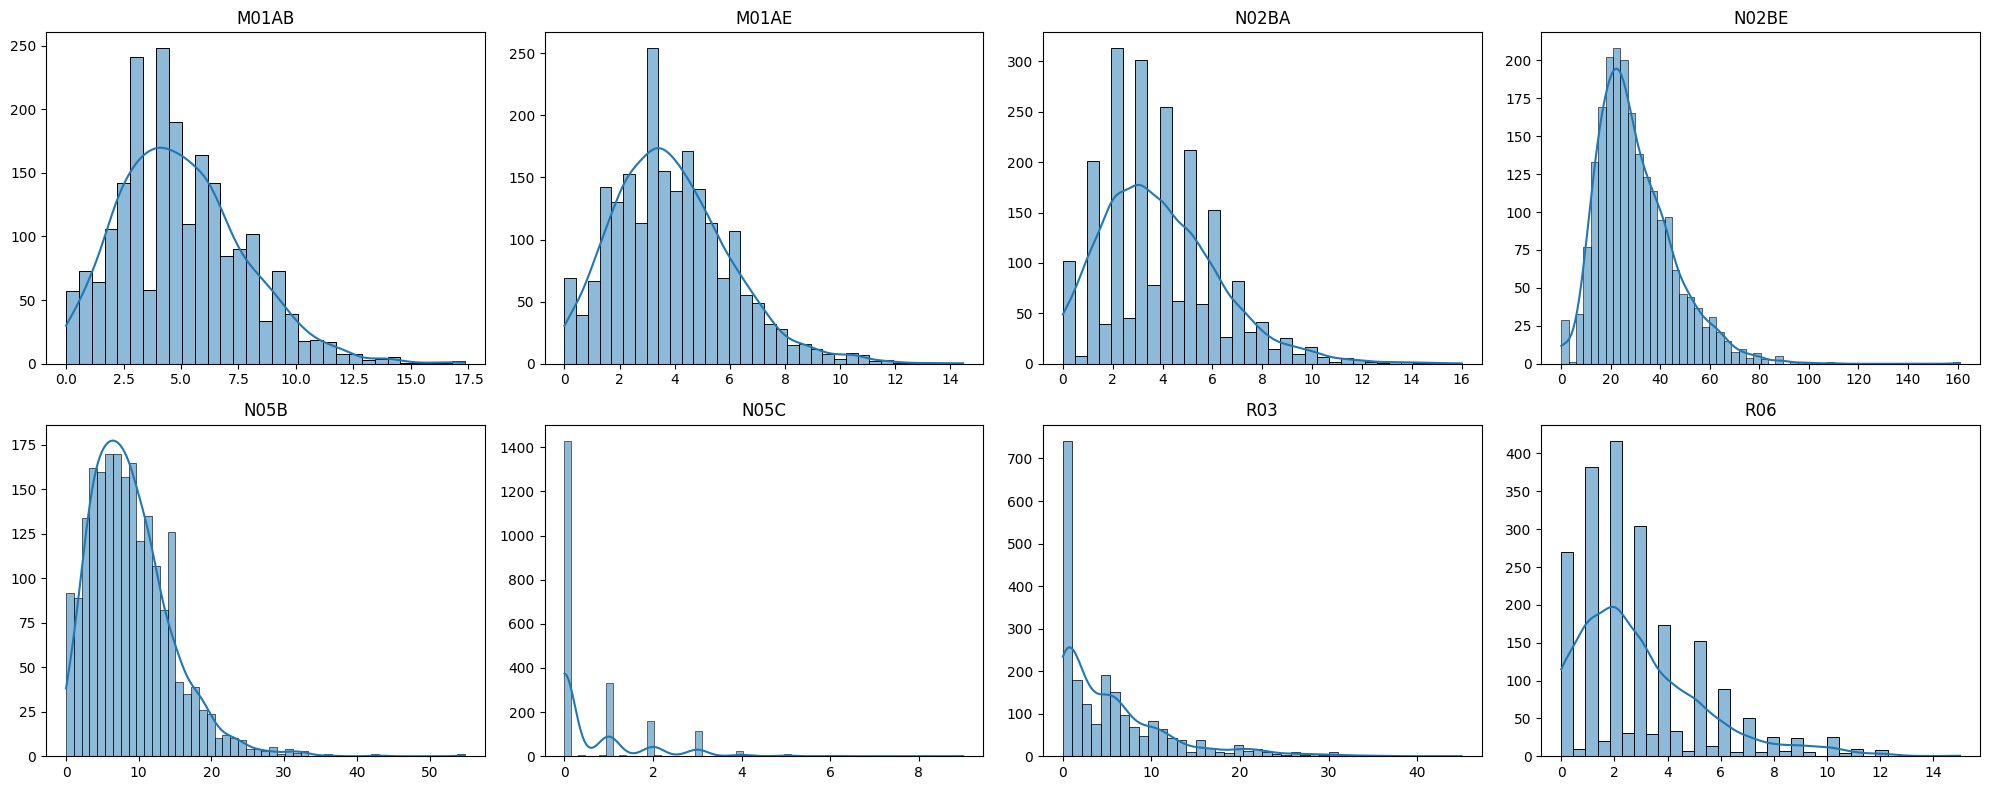

In [212]:
columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03','R06']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

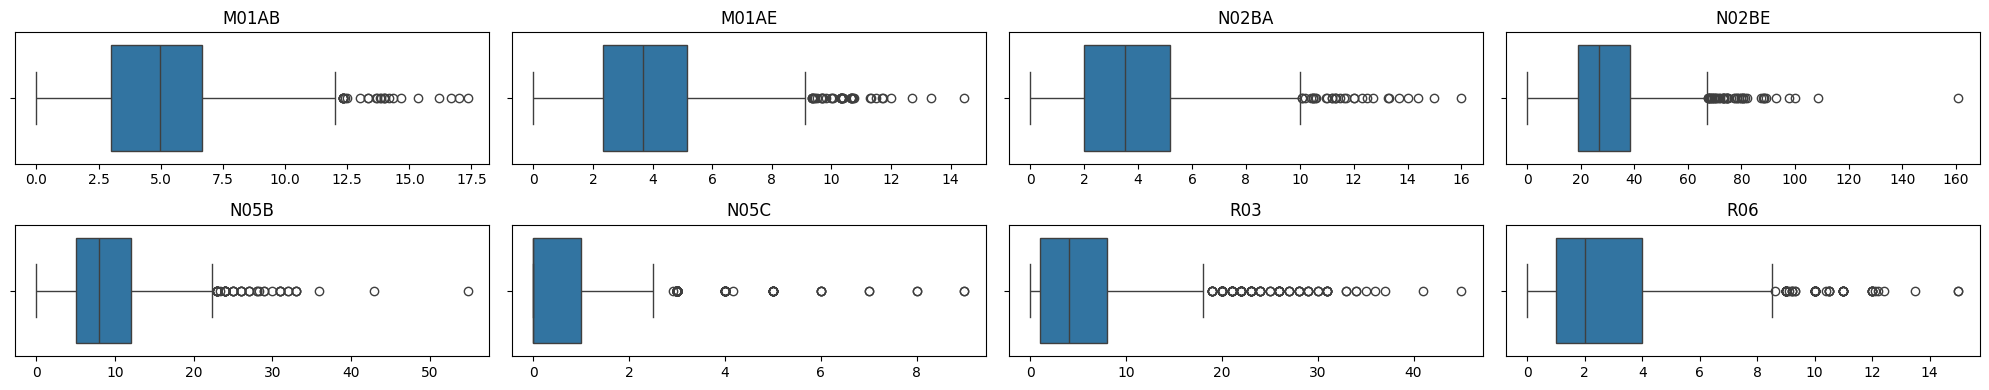

In [213]:
fig, axes = plt.subplots(2, 4, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [214]:
def plot(data, columns, x):
    fig, axes = plt.subplots(4, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

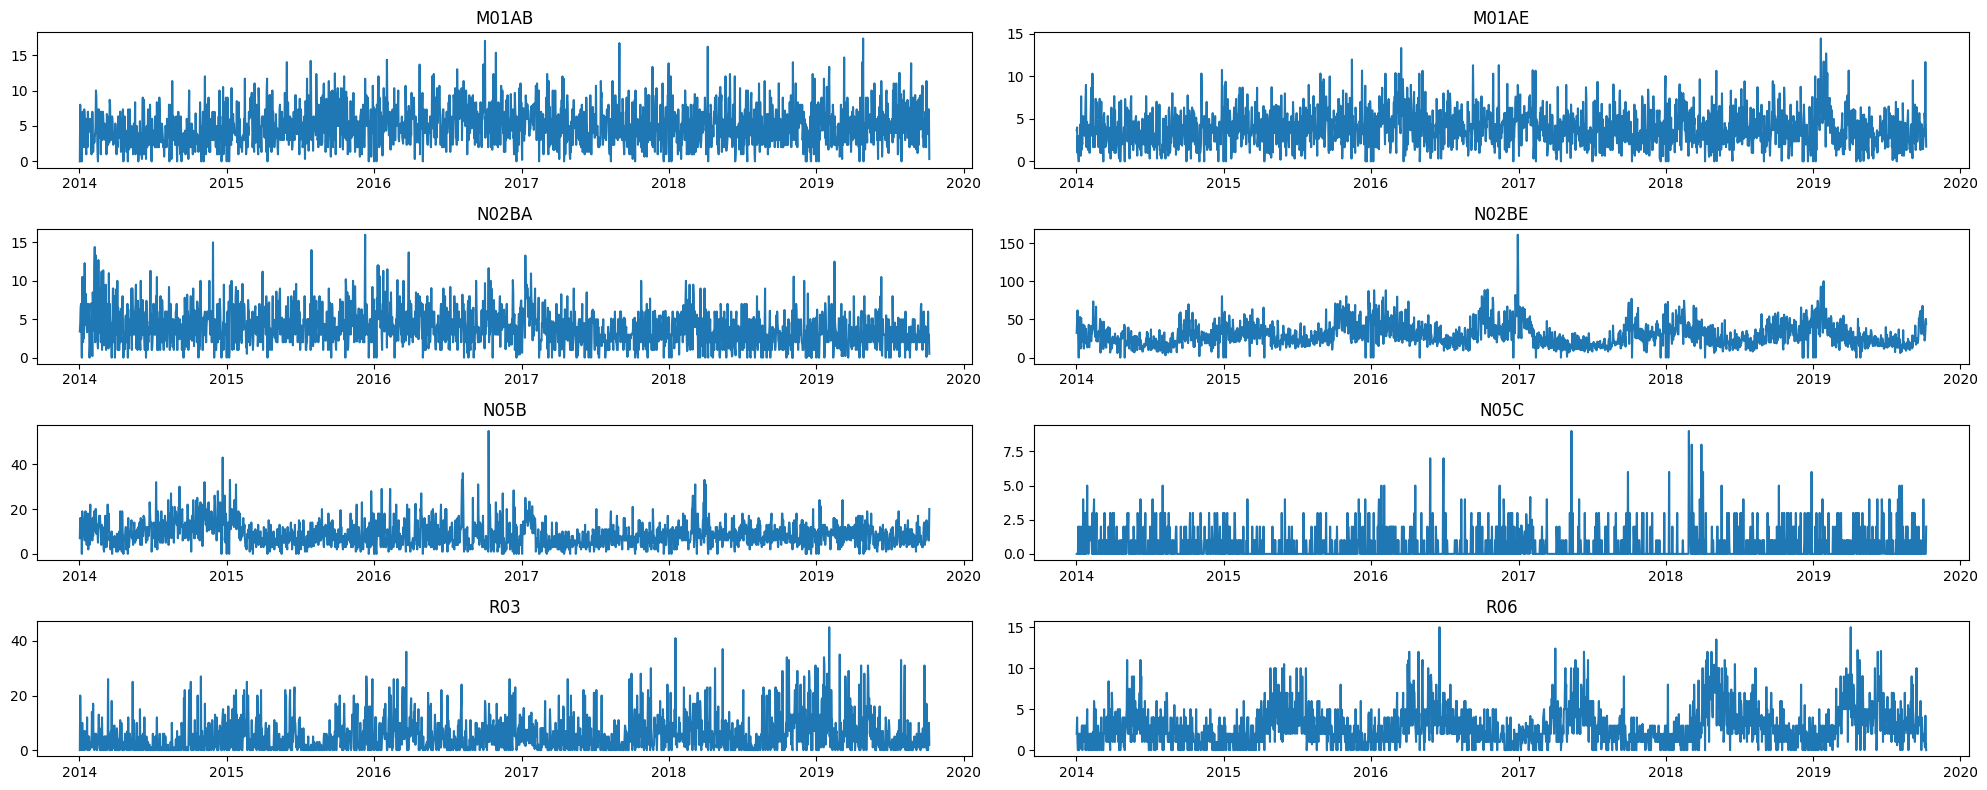

In [215]:
plot(data, columns, 'datum')

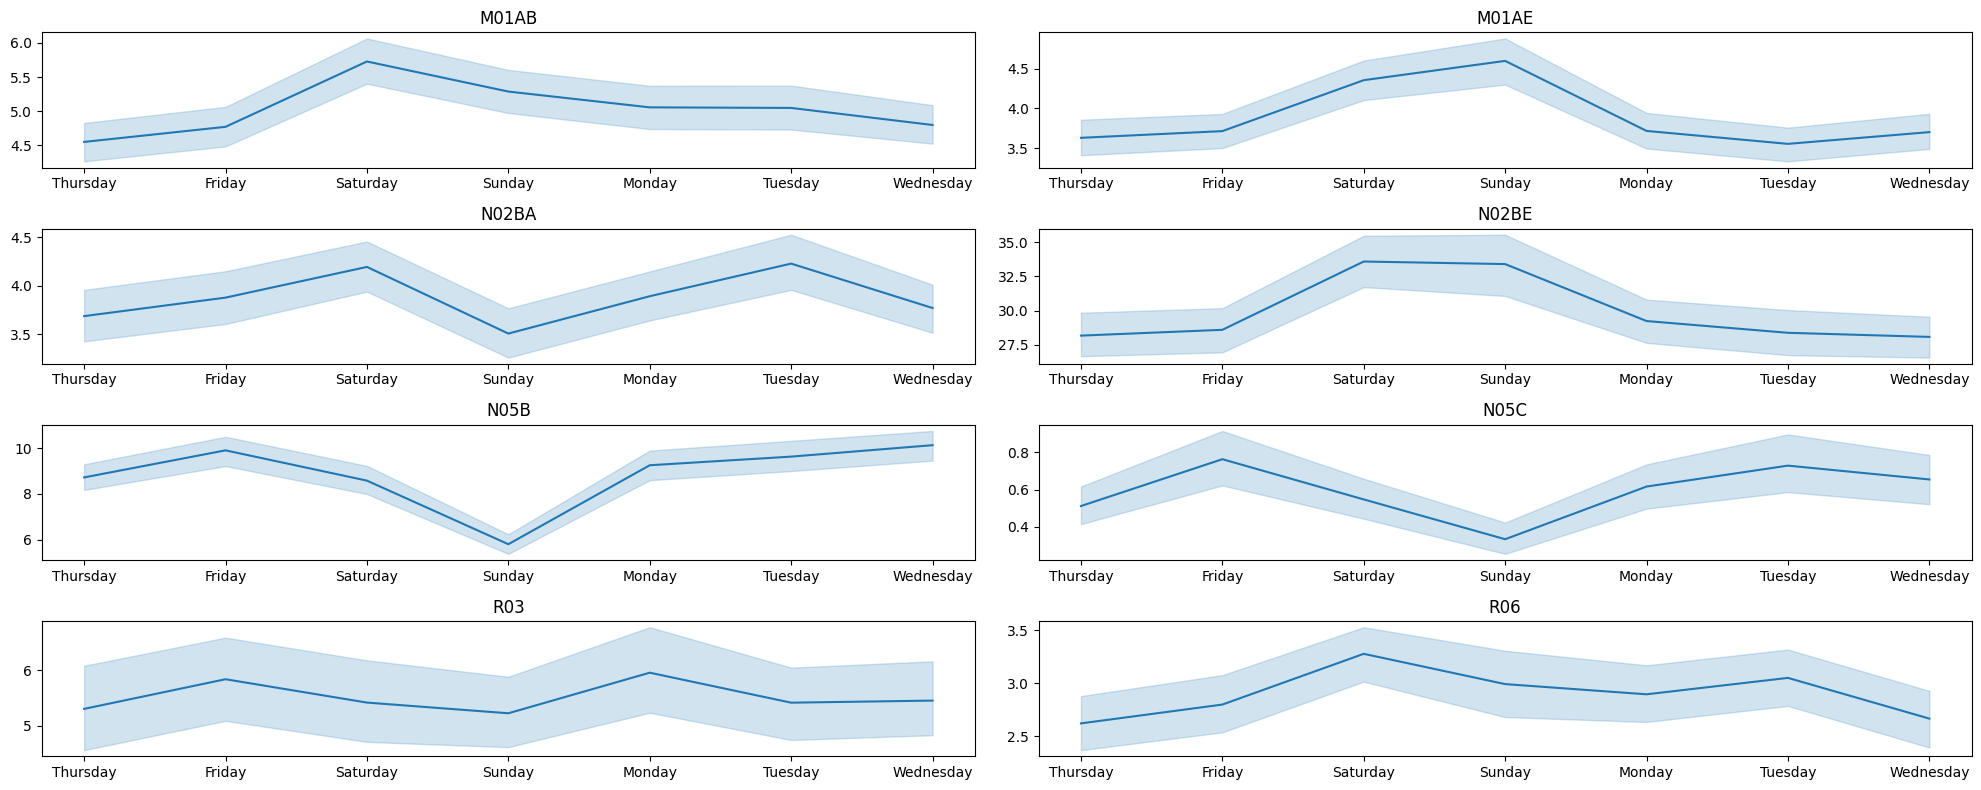

In [216]:
plot(data, columns, 'Weekday Name')

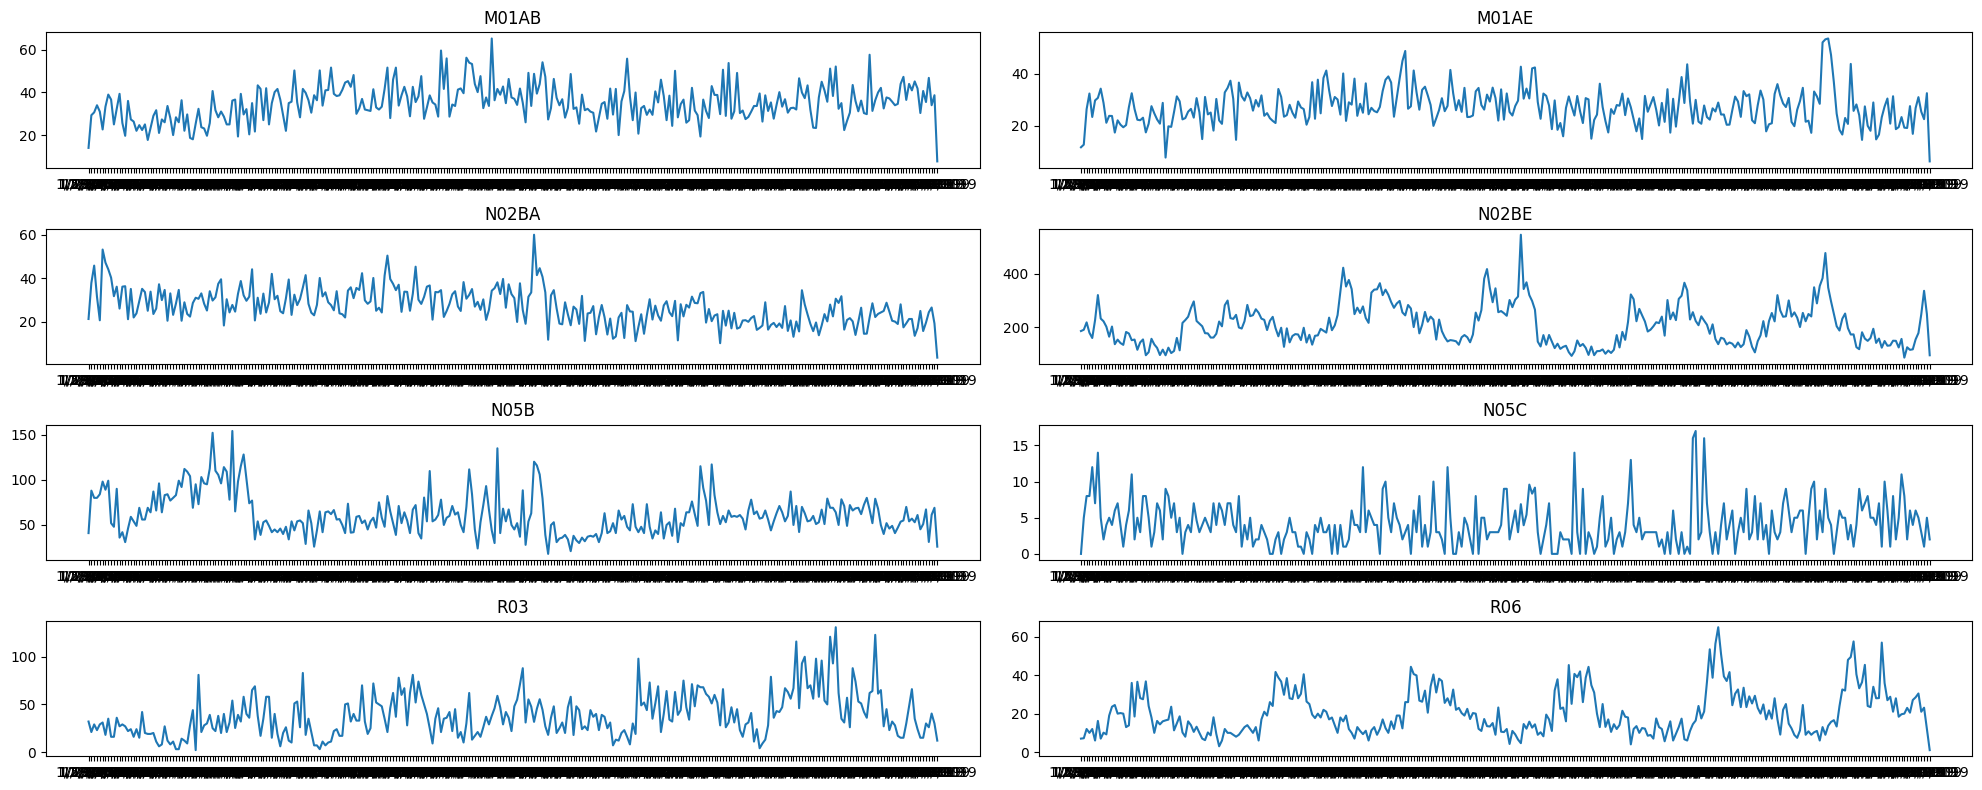

In [217]:
plot(data1, columns, 'datum')

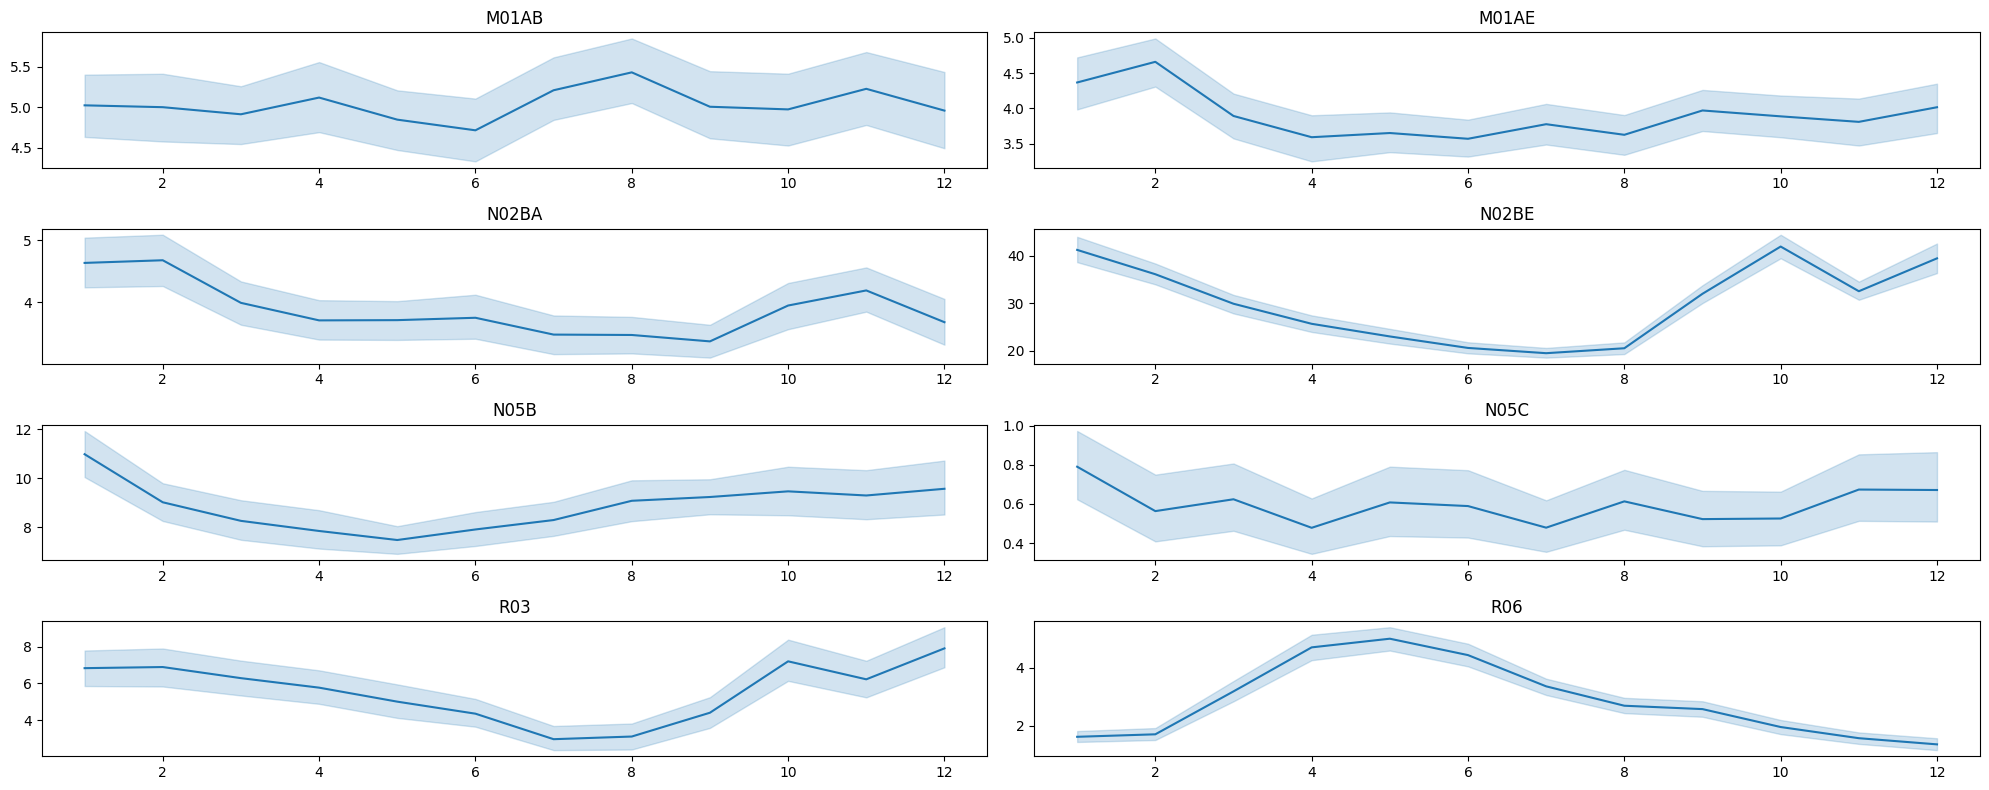

In [218]:
plot(data, columns, 'Month')

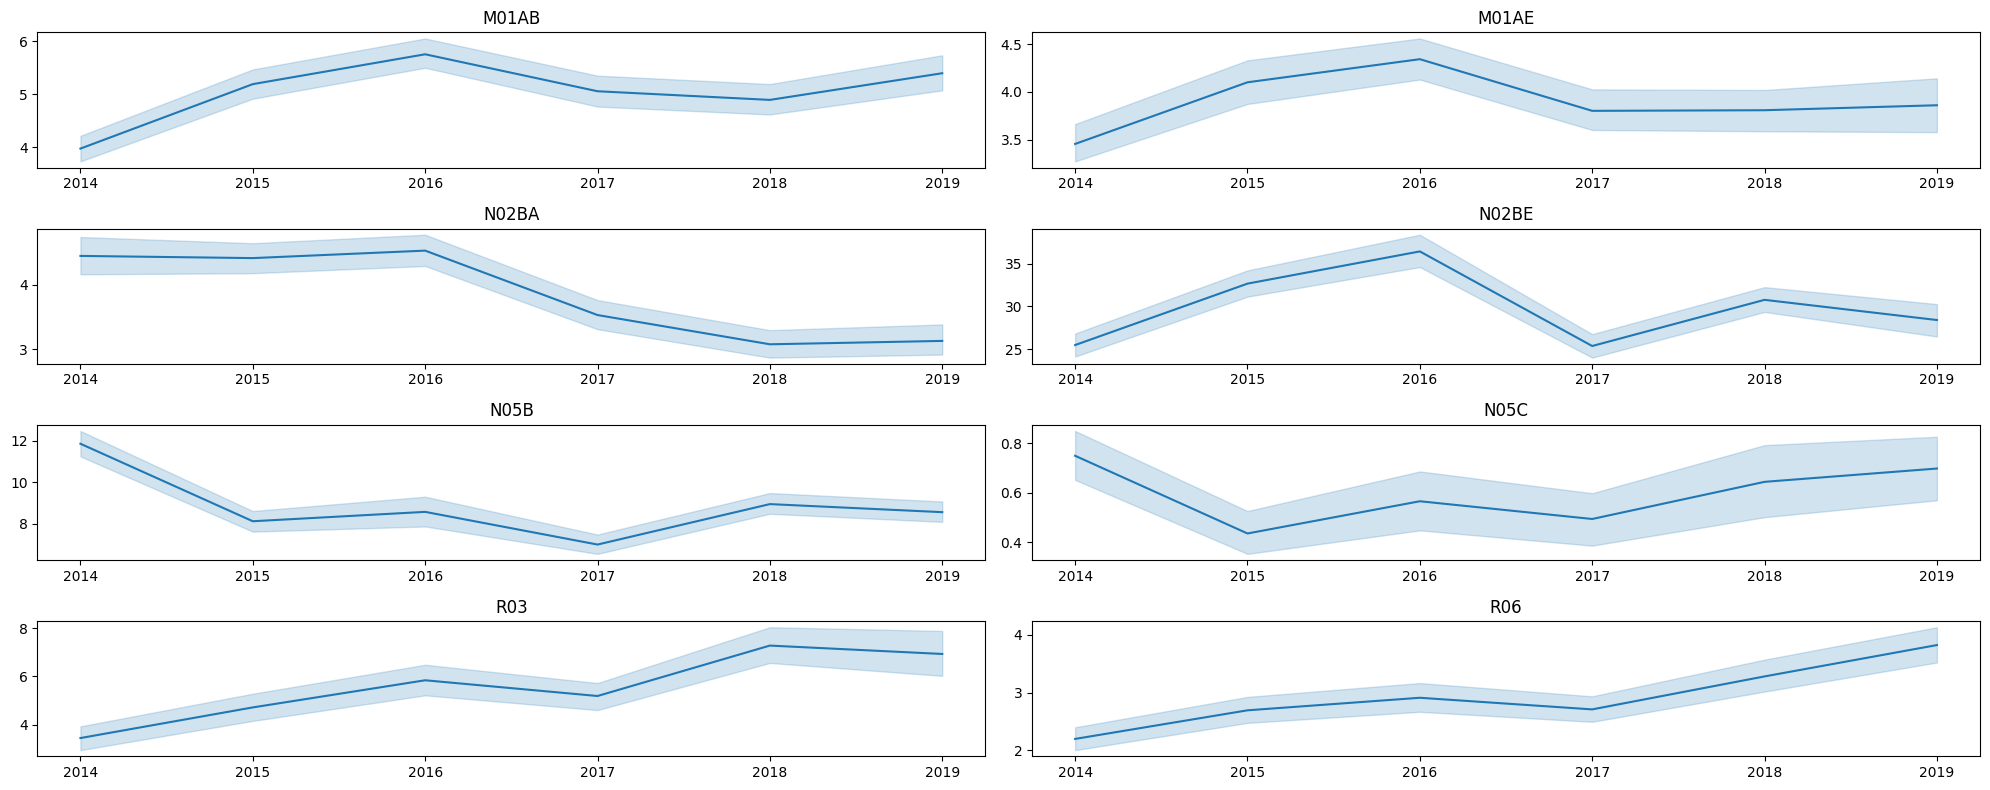

In [219]:
plot(data, columns, 'Year')

In [220]:
data['Weekday Name'].value_counts()

Weekday Name
Thursday     301
Friday       301
Saturday     301
Sunday       301
Monday       301
Tuesday      301
Wednesday    300
Name: count, dtype: int64

In [221]:
scale_mapper = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
    }

data['Weekday Name'] = data['Weekday Name'].replace(scale_mapper)


In [222]:
data["Season"] =    np.where(data["Month"].isin([3,4,5]),"Spring",
                    np.where(data["Month"].isin([6,7,8]), "Summer",
                    np.where(data["Month"].isin ([9,10,11]),"Fall",
                    np.where(data["Month"].isin ([12,1,2]),"Winter","None"))))

In [223]:
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,Day,Season
datum,,,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,3,2,Winter
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,4,3,Winter
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,5,4,Winter
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,6,5,Winter
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,0,6,Winter


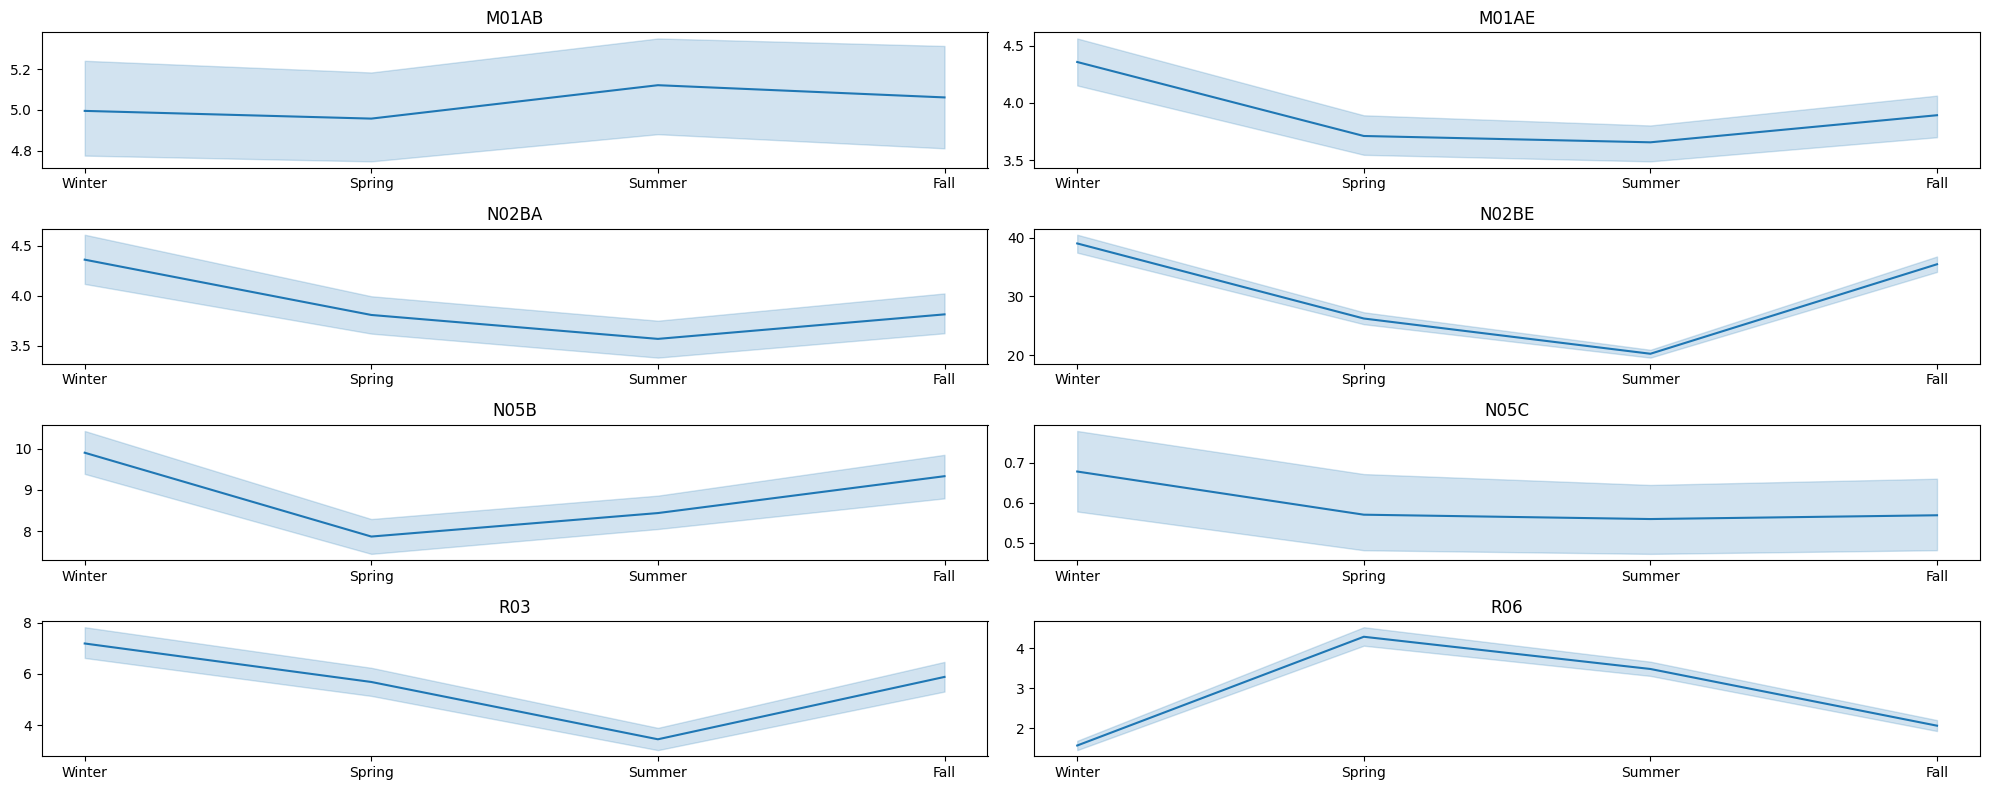

In [224]:
plot(data, columns, 'Season')

In [225]:
data = pd.get_dummies(data=data, columns=['Season'])


In [226]:
data = data.drop(columns=['Hour'])

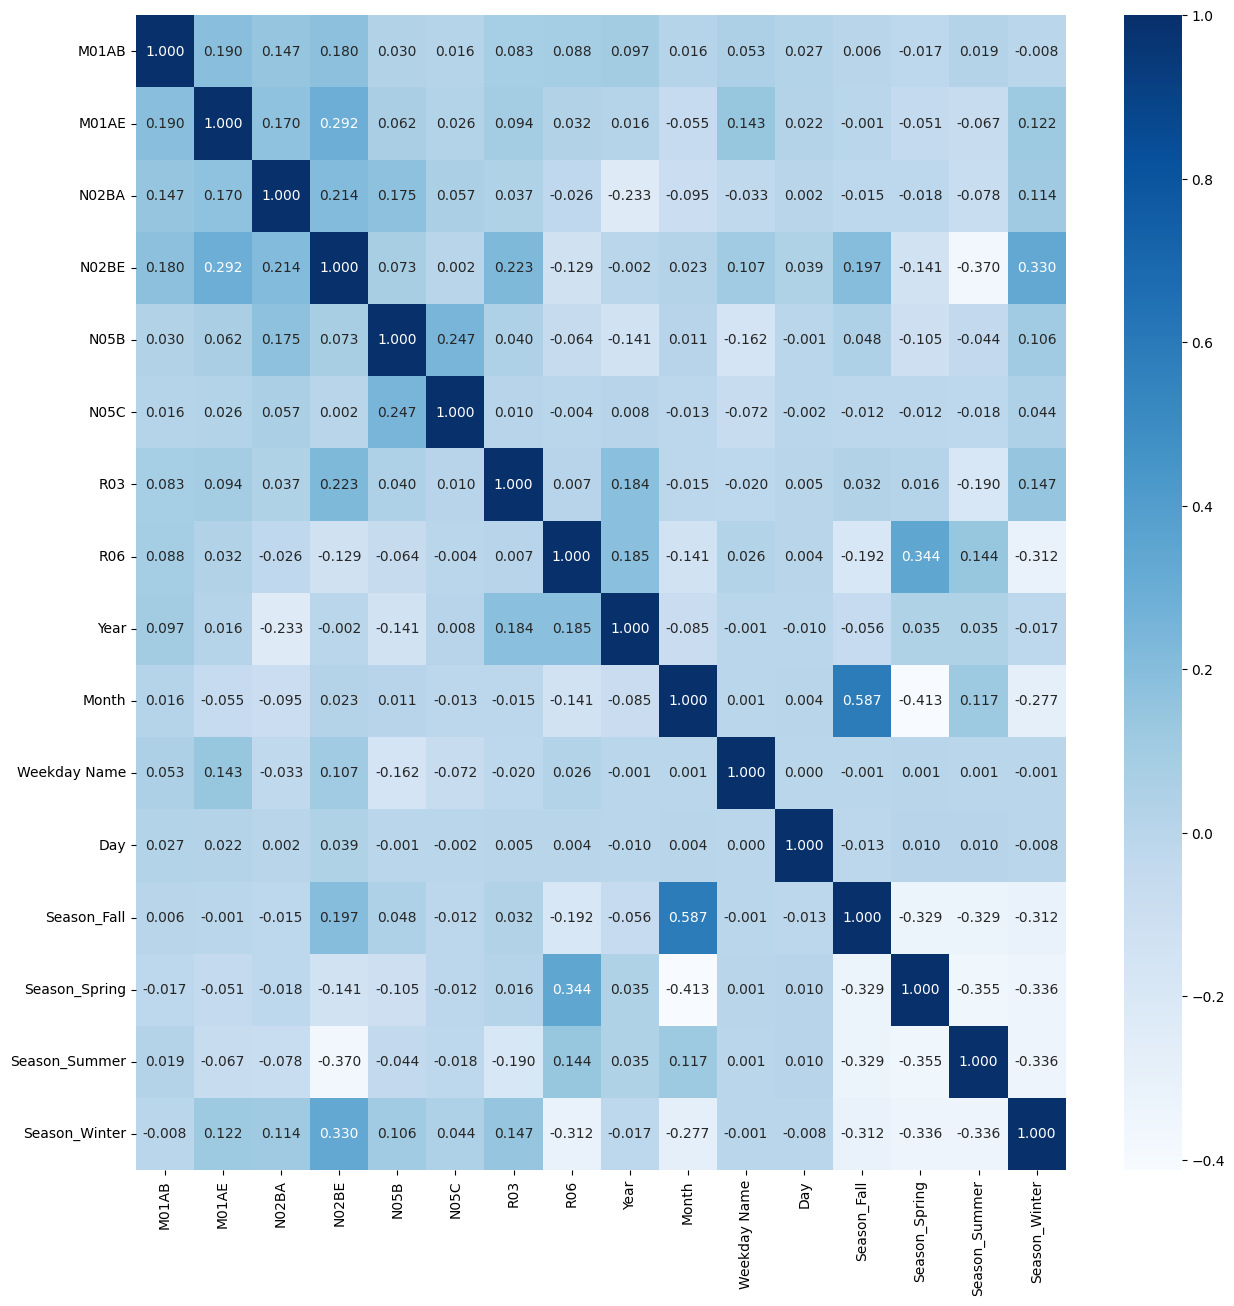

In [227]:
df_corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [228]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (1474, 16) 
Validation size :  (421, 16) 
Test Size :  (211, 16)


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Weekday Name,Day,Season_Fall,Season_Spring,Season_Summer,Season_Winter
datum,,,,,,,,,,,,,,,,
2014-01-02,0.00,3.670,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,3,2,False,False,False,True
2014-01-03,8.00,4.000,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,4,3,False,False,False,True
2014-01-04,2.00,1.000,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,5,4,False,False,False,True
2014-01-05,4.00,3.000,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,6,5,False,False,False,True
2014-01-06,5.00,1.000,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,0,6,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-10,9.33,7.406,6.0,44.50,12.0,0.0,6.0,2.0,2018,1,2,10,False,False,False,True
2018-01-11,4.00,4.330,5.5,37.60,7.0,0.0,5.0,0.0,2018,1,3,11,False,False,False,True
2018-01-12,5.66,1.330,3.0,42.00,11.0,0.0,10.0,0.0,2018,1,4,12,False,False,False,True


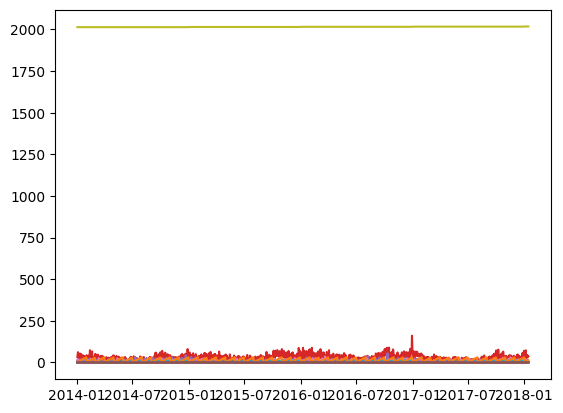

In [229]:
plt.plot(train_df)

In [230]:
train_df.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

Normalizacija podataka

In [231]:
scaler = MinMaxScaler()

col = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [232]:
def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size])
    return np.array(X), np.array(Y)

In [233]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 11, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 11, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 11, 1)

In [234]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (1463, 11, 16) (1463, 16) 
 Val size :  (410, 11, 16) (410, 16) 
 Test Size :  (200, 11, 16) (1463, 16)


Modeli


In [235]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

Epoch 1/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0998 - mean_absolute_error: 0.2519 - val_loss: 0.1273 - val_mean_absolute_error: 0.2794
Epoch 2/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.2476 - val_loss: 0.1265 - val_mean_absolute_error: 0.2812
Epoch 3/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.2474 - val_loss: 0.1258 - val_mean_absolute_error: 0.2839
Epoch 4/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.2465 - val_loss: 0.1259 - val_mean_absolute_error: 0.2829
Epoch 5/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.2460 - val_loss: 0.1259 - val_mean_absolute_error: 0.2831
Epoch 6/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.2473 - val_loss: 0.1254 - val_mean_absolute_error: 0.2865
Epoch 7/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0952 - mean_absolute_er

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_32 (SimpleRNN)       │ (None, 11, 50)         │         3,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_33 (SimpleRNN)       │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_34 (SimpleRNN)       │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_35 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,104 (144.94 KB)

 Trainable params: 18,551 (72.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,553 (72.48 KB)

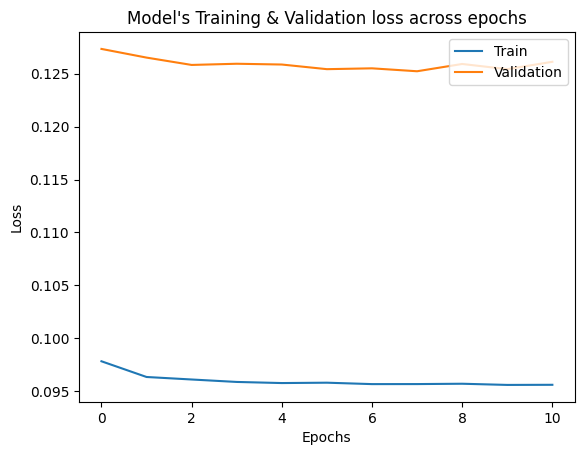

In [241]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50,activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = 1,activation='sigmoid'))
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error"],loss = "mean_squared_error")
history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 11, batch_size = 1)
model.summary()
plotloss(history)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1006 - mean_absolute_error: 0.2482 - mean_squared_error: 0.1006 - val_loss: 0.1257 - val_mean_absolute_error: 0.2918 - val_mean_squared_error: 0.1255
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0960 - mean_absolute_error: 0.2480 - mean_squared_error: 0.0960 - val_loss: 0.1261 - val_mean_absolute_error: 0.2845 - val_mean_squared_error: 0.1259
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0952 - mean_absolute_error: 0.2449 - mean_squared_error: 0.0952 - val_loss: 0.1257 - val_mean_absolute_error: 0.2884 - val_mean_squared_error: 0.1255
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0961 - mean_absolute_error: 0.2474 - mean_squared_error: 0.0961 - val_loss: 0.1255 - val_mean_absolute_error: 0.2902 - val_mean_squared_error: 0.1253
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0962 - mean_absolute_error: 0.2477 - mean_squared_error: 0.0962 - val_loss: 0.1255 - val_mean_absol

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 11, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,705 (409.01 KB)

 Trainable params: 34,901 (136.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,804 (272.68 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1410 - mean_absolute_error: 0.2876 - mean_squared_error: 0.1409 


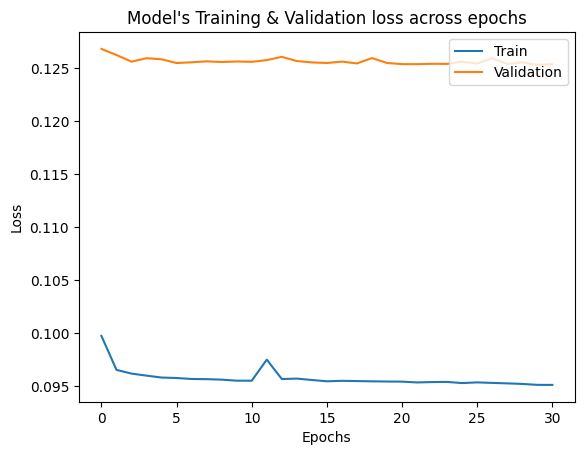

Metric  loss : 0.14
Metric  compile_metrics : 0.29


In [239]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(50, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(1,activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=20,batch_size=32, callbacks=[history])
regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
for i in range(len(regressorLSTM.metrics_names)):
    print("Metric ",regressorLSTM.metrics_names[i],":",str(round(result[i],2)))


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1125 - mean_absolute_error: 0.2594 - val_loss: 0.1270 - val_mean_absolute_error: 0.2811
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0966 - mean_absolute_error: 0.2477 - val_loss: 0.1257 - val_mean_absolute_error: 0.2920
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0956 - mean_absolute_error: 0.2464 - val_loss: 0.1254 - val_mean_absolute_error: 0.2879
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0957 - mean_absolute_error: 0.2470 - val_loss: 0.1254 - val_mean_absolute_error: 0.2905
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0952 - mean_absolute_error: 0.2461 - val_loss: 0.1253 - val_mean_absolute_error: 0.2889
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0953 - mean_absolute_error: 0.2454 - val_loss: 0.1253 - val_mean_absolute_error: 0.2870
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0956 - mean_absolute_error: 0.2461 - val_loss

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_32 (GRU)                    │ (None, 11, 50)         │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_33 (GRU)                    │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_34 (GRU)                    │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_35 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,455 (658.03 KB)

 Trainable params: 56,151 (219.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 112,304 (438.69 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1416 - mean_absolute_error: 0.2854 
Metric  loss : 0.14
Metric  compile_metrics : 0.29


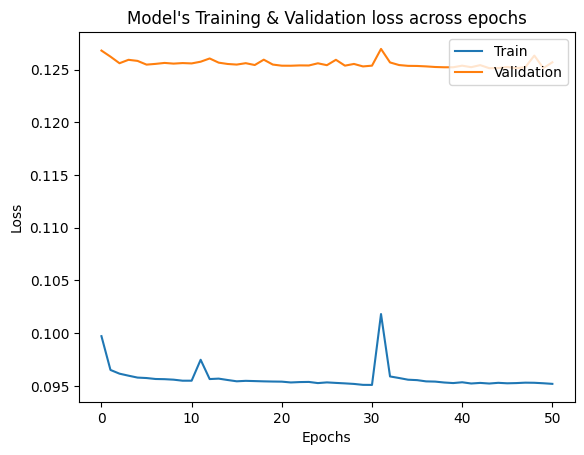

In [240]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=20,batch_size=32, callbacks=[history])
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)
for i in range(len(regressorGRU.metrics_names)):
    print("Metric ",regressorGRU.metrics_names[i],":",str(round(result[i],2)))
plotloss(history)